# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
dataset_dir = './traffic-signs-data/'
training_file = dataset_dir + 'train.p'
validation_file= dataset_dir + 'valid.p'
testing_file = dataset_dir + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
X_test.shape
type(X_train[0])

numpy.ndarray

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [20]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)
assert len(X_train) == len(y_train)

# TODO: Number of validation examples
n_validation = len(X_valid)
assert len(X_valid) == len(y_valid)

# TODO: Number of testing examples.
n_test = len(X_test)
assert len(X_test) == len(y_test)

# TODO: What's the shape of an traffic sign image?
image_width = X_test.shape[1]
image_height = X_test.shape[2]
image_channels = X_test.shape[3]
image_shape = (image_width, image_height, image_channels)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 104397
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Traffic Sign Id, Traffic Sign Label, Count in Training Set
0, Speed limit (20km/h), 180
1, Speed limit (30km/h), 1980
2, Speed limit (50km/h), 2010
3, Speed limit (60km/h), 1260
4, Speed limit (70km/h), 1770
5, Speed limit (80km/h), 1650
6, End of speed limit (80km/h), 360
7, Speed limit (100km/h), 1290
8, Speed limit (120km/h), 1260
9, No passing, 1320
10, No passing for vehicles over 3.5 metric tons, 1800
11, Right-of-way at the next intersection, 1170
12, Priority road, 1890
13, Yield, 1920
14, Stop, 690
15, No vehicles, 540
16, Vehicles over 3.5 metric tons prohibited, 360
17, No entry, 990
18, General caution, 1080
19, Dangerous curve to the left, 180
20, Dangerous curve to the right, 300
21, Double curve, 270
22, Bumpy road, 330
23, Slippery road, 450
24, Road narrows on the right, 240
25, Road work, 1350
26, Traffic signals, 540
27, Pedestrians, 210
28, Children crossing, 480
29, Bicycles crossing, 240
30, Beware of ice/snow, 390
31, Wild animals crossing, 690
32, End of all spe

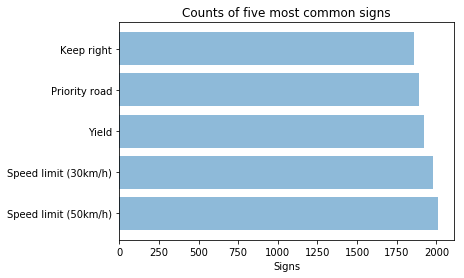

In [3]:
import csv
import collections
import random
import numpy as np
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

signnames = {}
with open('signnames.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader) # skip header
    for row in csvreader:
        # add each sign description to the dictionary
        if row[0] in signnames :
            raise RuntimeError('key ' + row[0] + ' already exists: ' + signames[row[0]])
        signnames[row[0]] = row[1]
        
counter = collections.Counter(y_train)
print("Traffic Sign Id, Traffic Sign Label, Count in Training Set")
for elem, count in counter.items() :
    label = signnames[str(elem)]
    print("%d, %s, %d" %(elem, label, count))

print()
# Plot counts of five most common signs
objects = []
counts = []
for elem, count in counter.most_common(5) :
    label = signnames[str(elem)]
    objects.append(label)
    counts.append(count)
    
y_pos = np.arange(len(objects)) 
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Signs')
plt.title('Counts of five most common signs') 
plt.show()    

    

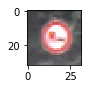

sign id: 10 No passing for vehicles over 3.5 metric tons
per channel means:  [ 124.68847656  106.96972656  108.7109375 ]


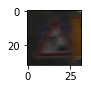

sign id: 25 Road work
per channel means:  [ 47.58789062  39.56640625  35.07617188]


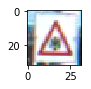

sign id: 30 Beware of ice/snow
per channel means:  [ 188.78515625  188.36816406  197.01660156]


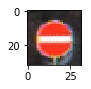

sign id: 17 No entry
per channel means:  [ 122.86425781   74.44921875   69.5234375 ]


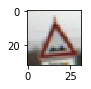

sign id: 22 Bumpy road
per channel means:  [ 176.02832031  166.70410156  163.08203125]

mean of training data


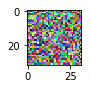

stddev of training data


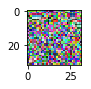

In [4]:
# show five randomly selected traffic signs
for i in range(0,5) :
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()

    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.show()
    print("sign id:", y_train[index], signnames[str(y_train[index])])
    
    # per channel mean for each picture
    # results show different pictures may have different brightness
    channel_means = image.mean(axis=(0,1))
    print("per channel means: ", channel_means)
    
print()    
# calculate mean and stddev image from training set
mean_image = X_train.mean(axis=0)
stddev_image = X_train.std(axis=0)
# show them
print("mean of training data")
plt.figure(figsize=(1,1))
plt.imshow(mean_image)
plt.show()
print("stddev of training data")
plt.figure(figsize=(1,1))
plt.imshow(stddev_image)
plt.show()

feature_standardized = False

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Example of rotated image
shape of pre-processed and augmentated training data : (104397, 32, 32, 3) (104397,)


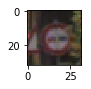

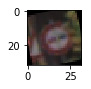

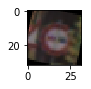

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2

def preprocess(images) :
    # rescale to [0,1]
    images = 0.1 + (images / 255.0)*0.8
    # remove per channel brightness from each image
    for image in images :
        channel_means = image.mean(axis=(0,1))
        for channel in range(0,image.shape[2]) : 
            image[:,:,channel] -= channel_means[channel]
    # calculate mean and stddev for each dimension for all images
    mean_image = images.mean(axis=0)
    stddev_image = images.std(axis=0)
    # normalize the images
    images = images -  mean_image
    images = images / stddev_image
    return images

# Shuffling the training data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

# Data augmentation
# for each image in X_train, add one image rotated -15 degrees and another rotated +15 degrees
print("Example of rotated image")
image = X_train[0]
plt.figure(figsize=(1,1))
plt.imshow(image)
rows,cols,ch = image.shape    
M = cv2.getRotationMatrix2D((cols/2,rows/2),15,1)
rot_image = cv2.warpAffine(image,M,(cols,rows))
plt.figure(figsize=(1,1))
plt.imshow(rot_image)
M = cv2.getRotationMatrix2D((cols/2,rows/2),-15,1)
rot_image = cv2.warpAffine(image,M,(cols,rows))
plt.figure(figsize=(1,1))
plt.imshow(rot_image)

if not feature_standardized :
    
    # data augmentation only for training set
    X_aug = []
    y_aug = []
    for image, label in zip(X_train, y_train) :
        rows,cols,ch = image.shape
        # rotate by +15 degrees
        M = cv2.getRotationMatrix2D((cols/2,rows/2),15,1)
        rot_image = cv2.warpAffine(image,M,(cols,rows))
        X_aug.append(rot_image)
        y_aug.append(label)
        # rotate by -15 degrees
        M = cv2.getRotationMatrix2D((cols/2,rows/2),-15,1)
        rot_image = cv2.warpAffine(image,M,(cols,rows))
        X_aug.append(rot_image)
        y_aug.append(label)

    X_aug = np.array(X_aug)
    y_aug = np.array(y_aug)
    X_train = np.concatenate((X_train, X_aug))
    y_train = np.concatenate((y_train, y_aug))

    # pre-process
    X_train = preprocess(X_train)
    X_valid = preprocess(X_valid)
    X_test = preprocess(X_test)
    
    feature_standardized = True

print("shape of pre-processed and augmentated training data :", X_train.shape, y_train.shape)

### Model Architecture

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Setting up TensorFlow
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

In [7]:
# LeNet Architecture modified for traffic signs

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # ColorMap Layer : Input 32x32x3. Output = 32x32x3
    # Filter size : 1x1x3x3
    WC = tf.Variable(tf.truncated_normal(shape=(1,1,3,3), mean = mu, stddev=sigma))
    BC = tf.Variable(tf.zeros(3))
    conv_color = tf.nn.conv2d(x, WC, strides=[1, 1, 1, 1], padding='SAME') + BC
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    # Filter size must be 5x5x3x6 (height x width x input x output)
    W1 = tf.Variable(tf.truncated_normal(shape=(5,5,3,6), mean = mu, stddev=sigma))
    # Weights must be of size 6
    B1 = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(conv_color, W1, strides=[1, 1, 1, 1], padding='VALID') + B1

    # TODO: Activation.
    act1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = tf.nn.max_pool(act1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    # Filter size: 5x5x6x16
    W2 = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean = mu, stddev=sigma)) 
    # Bias size: 16
    B2 = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(pool1, W2, strides=[1, 1, 1, 1], padding='VALID') + B2
    
    # TODO: Activation.
    act2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = tf.nn.max_pool(act2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400
    flat_pool2 = flatten(pool2)
    
    # Input = 14x14x6. Output = 1176
    flat_pool1 = flatten(pool1)
    
    # concat flattened pool1 and pool2
    # Input 400 & 1176. Output = 1576
    flat = tf.concat(1, [flat_pool2, flat_pool1])
    
    # TODO: Layer 3: Fully Connected. Input = 1576. Output = 1000.
    W3 = tf.Variable(tf.truncated_normal(shape=(1576,1000), mean = mu, stddev=sigma))
    B3 = tf.Variable(tf.zeros(1000))
    conv3 = tf.add(tf.matmul(flat, W3), B3)
    
    # TODO: Activation.
    act3 = tf.nn.relu(conv3)

    # TODO: Layer 4: Fully Connected. Input = 1000. Output = 400.
    W4 = tf.Variable(tf.truncated_normal(shape=(1000,400), mean = mu, stddev=sigma))
    B4 = tf.Variable(tf.zeros(400))
    conv4 = tf.add(tf.matmul(act3, W4), B4)
    
    # TODO: Activation.
    act4 = tf.nn.relu(conv4)

    # TODO: Layer 5: Fully Connected. Input = 400. Output = 43.
    W5 = tf.Variable(tf.truncated_normal(shape=(400,43), mean = mu, stddev=sigma))
    B5 = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(act4, W5), B5)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
# Placeholders for features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [11]:
# Training Pipeline
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
#optimizer = tf.train.AdamOptimizer()
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Feel free to use as many code cells as needed.

max_valid_accuracy = 0.0
max_valid_epoch = 0
max_valid_model_ckpt = './max_valid_ckpt'

# Training the model and reporting validation accuracy
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        epoch = i + 1
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {}: Validation Accuracy = {:.3f}".format(epoch, validation_accuracy))
        
        if (validation_accuracy > max_valid_accuracy) : 
            saver.save(sess, max_valid_model_ckpt)
            print("Model saved")
            max_valid_accuracy = validation_accuracy
            max_valid_epoch = epoch
            
        print()         
    
print("Max Validation Accuracy {:.3f} achieved at epoch {:d}".format(max_valid_accuracy, max_valid_epoch))    

Training...

EPOCH 1: Validation Accuracy = 0.867
Model saved

EPOCH 2: Validation Accuracy = 0.895
Model saved

EPOCH 3: Validation Accuracy = 0.879

EPOCH 4: Validation Accuracy = 0.902
Model saved

EPOCH 5: Validation Accuracy = 0.891

EPOCH 6: Validation Accuracy = 0.923
Model saved

EPOCH 7: Validation Accuracy = 0.924
Model saved

EPOCH 8: Validation Accuracy = 0.890

EPOCH 9: Validation Accuracy = 0.878

EPOCH 10: Validation Accuracy = 0.928
Model saved

EPOCH 11: Validation Accuracy = 0.916

EPOCH 12: Validation Accuracy = 0.915

EPOCH 13: Validation Accuracy = 0.934
Model saved

EPOCH 14: Validation Accuracy = 0.922

EPOCH 15: Validation Accuracy = 0.905

EPOCH 16: Validation Accuracy = 0.929

EPOCH 17: Validation Accuracy = 0.911

EPOCH 18: Validation Accuracy = 0.918

EPOCH 19: Validation Accuracy = 0.942
Model saved

EPOCH 20: Validation Accuracy = 0.909

EPOCH 21: Validation Accuracy = 0.917

EPOCH 22: Validation Accuracy = 0.914

EPOCH 23: Validation Accuracy = 0.924

EPO

In [13]:
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
ready_to_submit = True

if ready_to_submit == True :
    with tf.Session() as sess:
        saver.restore(sess, max_valid_model_ckpt)
        print("restored session")    
        test_accuracy = evaluate(X_test, y_test)
        print("Test Accuracy = {:.3f}".format(test_accuracy))
print("Done")        

restored session
Test Accuracy = 0.929
Done


In [14]:
with tf.Session() as sess:
    saver.restore(sess, max_valid_model_ckpt)
    print("restored session")    
    training_accuracy = evaluate(X_train, y_train)
    print("Training Accuracy = {:.3f}".format(training_accuracy))
print("Done")   

restored session
Training Accuracy = 0.999
Done


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

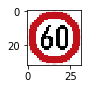

shape of the image:  (32, 32, 3)



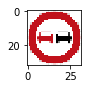

shape of the image:  (32, 32, 3)



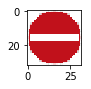

shape of the image:  (32, 32, 3)



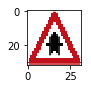

shape of the image:  (32, 32, 3)



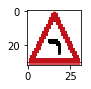

shape of the image:  (32, 32, 3)



In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob

image_paths = glob.glob('web_examples/*.jpeg')
web_images = []
for image_path in image_paths :
    #print(image_path)
    # cv2 reads as BGR
    bgr_image = cv2.imread(image_path)
    # convert to RGB
    b,g,r = cv2.split(bgr_image)
    image = cv2.merge([r,g,b])
    # resize to 32x32
    image = cv2.resize(image, (32, 32)) 
    # plot image
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.show()
    print("shape of the image: ", image.shape)
    web_images.append(image)
    print()

X_web = np.asarray(web_images)
y_web = np.array([3,9,17,11,19])  # manually populated based on the signnames table

### Predict the Sign Type for Each Image

Predicted signs for each of the following images are :


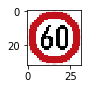

sign id: 3 Speed limit (60km/h)


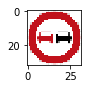

sign id: 9 No passing


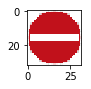

sign id: 17 No entry


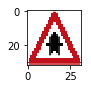

sign id: 11 Right-of-way at the next intersection


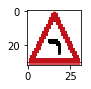

sign id: 19 Dangerous curve to the left


In [16]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# preprocess

X_web = preprocess(X_web)

prediction = tf.argmax(logits, 1)

with tf.Session() as sess:
    saver.restore(sess, max_valid_model_ckpt)
    predicted_signs = sess.run(prediction, feed_dict={x: X_web})
    
print("Predicted signs for each of the following images are :")
for sign_id, web_img in zip(predicted_signs, web_images) :
    # plot image
    plt.figure(figsize=(1,1))
    plt.imshow(web_img)
    plt.show()
    # print label
    label = signnames[str(sign_id)]
    print("sign id:", sign_id, label)
    

### Analyze Performance

In [17]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
num_correct = 0
for i, j in zip(predicted_signs, y_web) :
    if i == j :
        num_correct += 1

accuracy_pc = 100.0 * num_correct / len(y_web)
print("Accuracy % :", accuracy_pc)

Accuracy % : 100.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [18]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax = tf.nn.softmax(logits)
top_5 = tf.nn.top_k(softmax, k=5)
with tf.Session() as sess:
    saver.restore(sess, max_valid_model_ckpt)
    top_5_out = sess.run(top_5, feed_dict={x: X_web})
    print(top_5_out)

TopKV2(values=array([[  9.97144878e-01,   1.48523925e-03,   1.08707347e-03,
          2.29188387e-04,   2.60076358e-05],
       [  9.05143559e-01,   8.71173516e-02,   7.70291500e-03,
          3.60482336e-05,   1.94363821e-07],
       [  1.00000000e+00,   3.38034022e-21,   3.05689849e-23,
          5.96438702e-27,   2.84115184e-28],
       [  9.99998093e-01,   1.71179101e-06,   1.40379228e-07,
          7.17800432e-08,   5.22941779e-09],
       [  9.99998093e-01,   1.66717109e-06,   1.98016849e-07,
          4.16706669e-10,   1.83252788e-10]], dtype=float32), indices=array([[ 3, 36,  5, 38, 35],
       [ 9, 41, 20, 10, 35],
       [17, 22, 14, 34, 13],
       [11,  1, 30, 21, 34],
       [19,  2, 23, 30, 34]], dtype=int32))


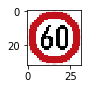

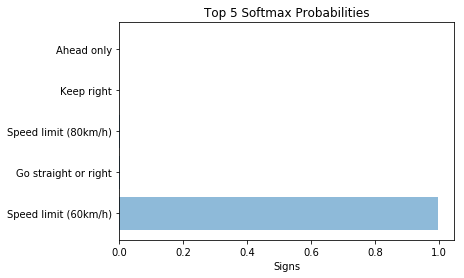

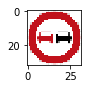

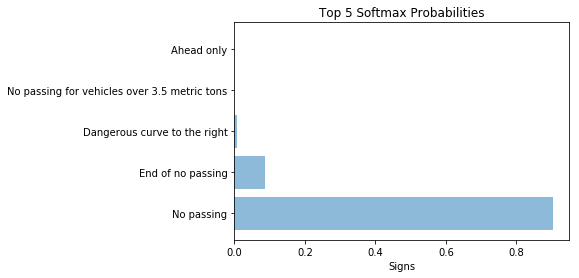

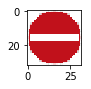

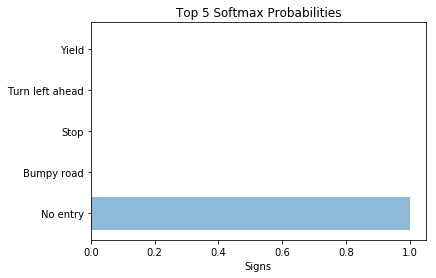

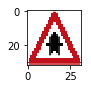

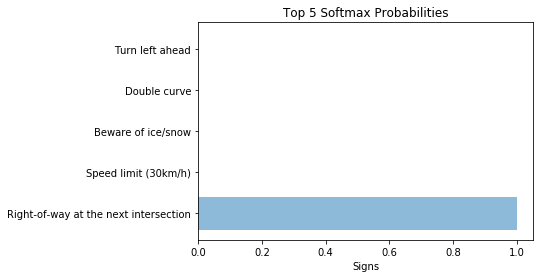

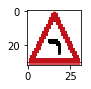

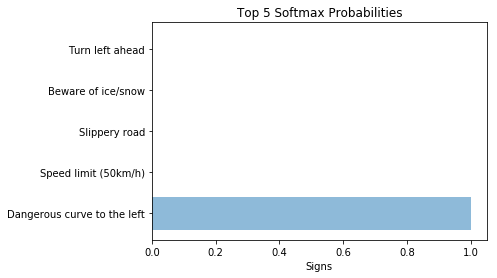

In [19]:
num_web_images = len(web_images)   
for i in range(0, num_web_images):
    probs = top_5_out.values[i,:]
    indices = top_5_out.indices[i,:]
    labels = [signnames[str(elem)] for elem in indices]
    # plot image
    plt.figure(figsize=(1,1))
    plt.imshow(web_images[i])
    plt.show()
    # plot barchart
    y_pos = np.arange(len(labels)) 
    plt.barh(y_pos, probs, align='center', alpha=0.5)
    plt.yticks(y_pos, labels)
    plt.xlabel('Signs')
    plt.title('Top 5 Softmax Probabilities')
    plt.show()    


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [301]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")